필사 Notebook
----
[Enefit: EDA + Catboost baseline](https://www.kaggle.com/code/syerramilli/enefit-eda-catboost-baseline)

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime
from pathlib import Path
# import holidays

## 데이터 불러오기

In [4]:
# 데이터 불러오기
data_path = Path('predict_energy_dataset')

train = pd.read_csv(data_path / 'train.csv', parse_dates=['datetime'])

In [5]:
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


## EDA
* 데이터셋 확인
* 결측치 확인
* 시계열 데이터 시각화

### 데이터 확인

In [6]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


In [7]:
# 결측치 확인
train.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [8]:
# 결측치 있으면 행 제거
train = train.dropna(how='any')
train.shape[0]

2017824

### 데이터 시각화

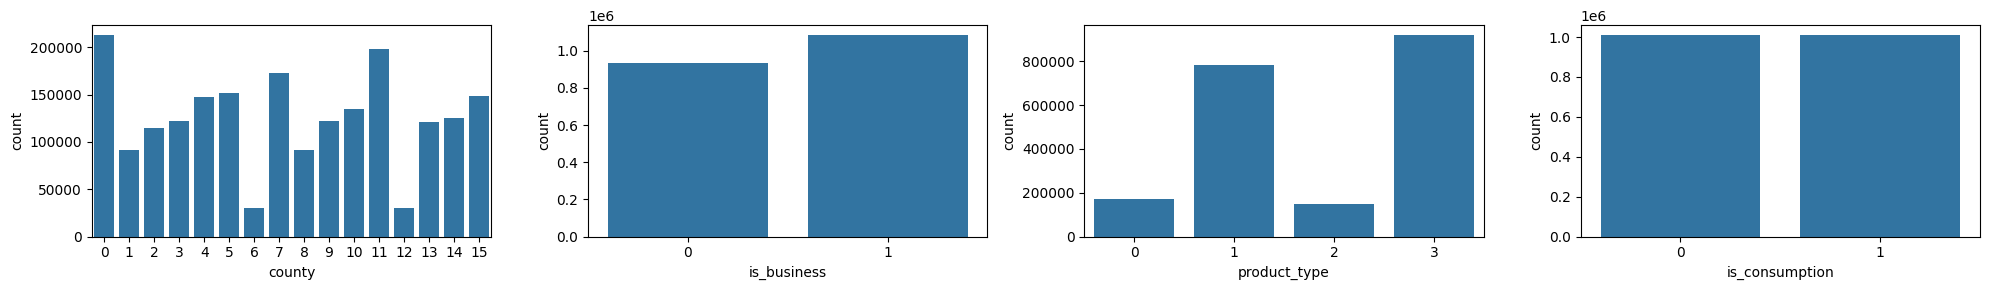

In [ ]:
# id를 제외한 수치형 데이터 추출
desc_columns = ['county','is_business','product_type','is_consumption']

fig, axs = plt.subplots(1, len(desc_columns), figsize=(5*len(desc_columns), 3))

# country, store, product 컬럼 시각화
for i, column in enumerate(desc_columns):
    _ = sns.countplot(train, x=column, ax=axs[i])

_ = fig.tight_layout()

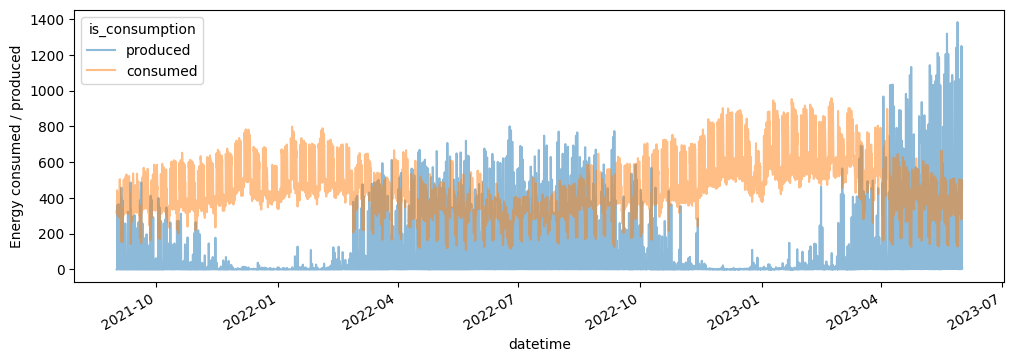

In [10]:
# 평균 production과 consumption 시계열 분석
train_avgd = (
    train
    .groupby(['datetime','is_consumption'])
    ['target'].mean()
    .unstack()
    .rename({0: 'produced', 1:'consumed'}, axis=1)
)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
_ = train_avgd.plot(ax=ax, alpha=0.5)
_ = ax.set_ylabel('Energy consumed / produced')

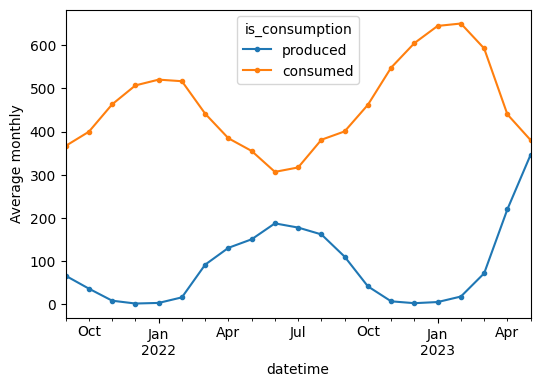

In [13]:
# 두 시리즈의 월별 평균 시각화
fig,ax = plt.subplots(1,1,figsize=(6,4))

_ = train_avgd.resample('ME').mean().plot(ax=ax, marker='.')
_ = ax.set_ylabel('Average monthly')

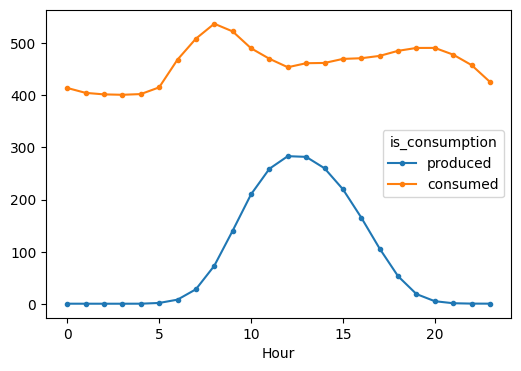

In [15]:
# 두 시리즈의 시간별 시각화
fig,ax = plt.subplots(1,1,figsize=(6,4))
train_avgd.groupby(train_avgd.index.hour).mean().plot(ax=ax, marker='.')
_ = ax.set_xlabel('Hour')